### o	Implement ADAM/Different optimiser in python and Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape,x_test.shape)## 60000,10000->no.of rows, 28,28-.size of one pixel

(60000, 28, 28) (10000, 28, 28)


In [4]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [5]:
x_train[0] #the value of 1 pixel in 0th index

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0] #in 0th index of target varaible,it has a class 5th

5

***Data Normalization***

In [7]:
x_train[0].max()# check the max value of one pixel in training dataset
x_test[0].max()

255

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]# we can see that after normalization the array ranges from 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

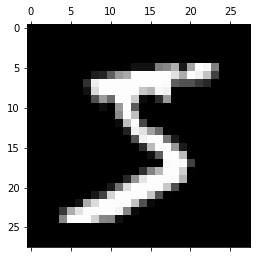

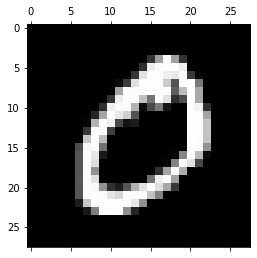

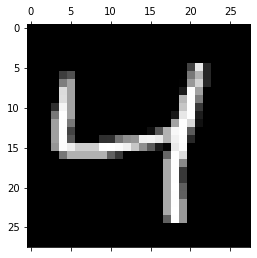

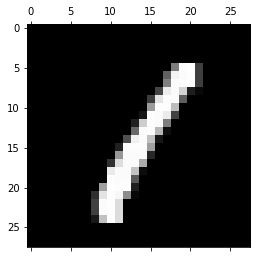

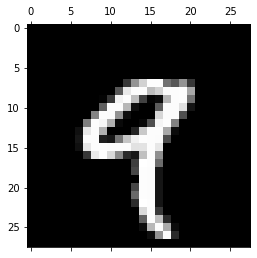

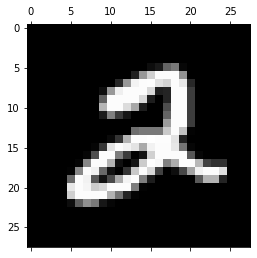

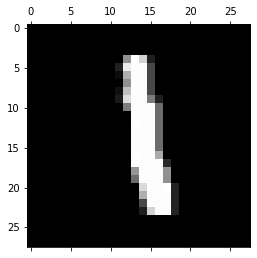

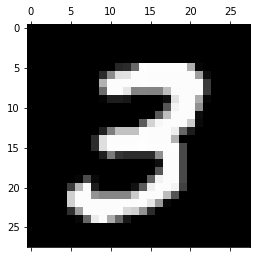

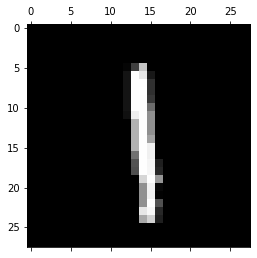

In [10]:
#we can check all datapoints ranging from 0 to 8 index

for i in range(9):
    plt.matshow(x_train[i],cmap='gray')
plt.show()


***Data preprocessing***
<p>Need to reshap because the the input takes only 1d array</p>

In [11]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)
print(x_train_flat.shape)

(60000, 784)


In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Perceptron
***Build a Model***

In [13]:

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras import models
model = Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
    
])


***Compile Model***

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

***Fit the model***

In [15]:
model.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 747us/step - loss: 0.4660 - accuracy: 0.8767
Epoch 2/20
1875/1875 [==============================] - 1s 754us/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/20
1875/1875 [==============================] - 1s 735us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/20
1875/1875 [==============================] - 1s 732us/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/20
1875/1875 [==============================] - 1s 725us/step - loss: 0.2667 - accuracy: 0.9259
Epoch 6/20
1875/1875 [==============================] - 1s 730us/step - loss: 0.2621 - accuracy: 0.9269
Epoch 7/20
1875/1875 [==============================] - 1s 726us/step - loss: 0.2581 - accuracy: 0.9289
Epoch 8/20
1875/1875 [==============================] - 1s 734us/step - loss: 0.2555 - accuracy: 0.9294
Epoch 9/20
1875/1875 [==============================] - 1s 755us/step - loss: 0.2536 - accuracy: 0.9295
Epoch 10/20
1875/1875 [==============================] - 2s 800u

***Evalute***

In [16]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 610us/step - loss: 0.2700 - accuracy: 0.9267


[0.26999226212501526, 0.9266999959945679]

***Model with Different Optimizers***
<p><b>1)SGD</p>

In [17]:
model_sgd = Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
    
])

In [18]:
model_sgd.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model_sgd.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 669us/step - loss: 0.7743 - accuracy: 0.8184
Epoch 2/20
1875/1875 [==============================] - 1s 709us/step - loss: 0.4539 - accuracy: 0.8811
Epoch 3/20
1875/1875 [==============================] - 1s 739us/step - loss: 0.4018 - accuracy: 0.8911
Epoch 4/20
1875/1875 [==============================] - 1s 697us/step - loss: 0.3758 - accuracy: 0.8970
Epoch 5/20
1875/1875 [==============================] - 1s 667us/step - loss: 0.3594 - accuracy: 0.9007
Epoch 6/20
1875/1875 [==============================] - 1s 661us/step - loss: 0.3476 - accuracy: 0.9036
Epoch 7/20
1875/1875 [==============================] - 1s 672us/step - loss: 0.3387 - accuracy: 0.9059
Epoch 8/20
1875/1875 [==============================] - 1s 683us/step - loss: 0.3316 - accuracy: 0.9072
Epoch 9/20
1875/1875 [==============================] - 1s 678us/step - loss: 0.3258 - accuracy: 0.9090
Epoch 10/20
1875/1875 [==============================] - 1s 693u

In [20]:
result=model_sgd.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 622us/step - loss: 0.2866 - accuracy: 0.9207


In [21]:
print('test loss,test acc: ',result)

test loss,test acc:  [0.28662964701652527, 0.9207000136375427]


<p><b>2)Adagrad</p>

In [22]:
model_Ada = Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid'),
    
])

In [23]:
model_Ada.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model_Ada.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 681us/step - loss: 1.5536 - accuracy: 0.6225
Epoch 2/20
1875/1875 [==============================] - 1s 682us/step - loss: 1.0572 - accuracy: 0.7892
Epoch 3/20
1875/1875 [==============================] - 1s 677us/step - loss: 0.8912 - accuracy: 0.8169
Epoch 4/20
1875/1875 [==============================] - 1s 793us/step - loss: 0.7999 - accuracy: 0.8312
Epoch 5/20
1875/1875 [==============================] - 1s 697us/step - loss: 0.7400 - accuracy: 0.8400
Epoch 6/20
1875/1875 [==============================] - 1s 703us/step - loss: 0.6968 - accuracy: 0.8464
Epoch 7/20
1875/1875 [==============================] - 1s 683us/step - loss: 0.6638 - accuracy: 0.8511
Epoch 8/20
1875/1875 [==============================] - 1s 687us/step - loss: 0.6375 - accuracy: 0.8554
Epoch 9/20
1875/1875 [==============================] - 1s 684us/step - loss: 0.6159 - accuracy: 0.8591
Epoch 10/20
1875/1875 [==============================] - 1s 682u

In [25]:
result1=model_Ada.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 619us/step - loss: 0.4781 - accuracy: 0.8847


In [26]:
print('test loss,test acc: ',result1)

test loss,test acc:  [0.47813695669174194, 0.8847000002861023]


### MLP
***Build a Model***

In [27]:
model1 = Sequential([
    Dense(10,input_shape=(784,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
])

***Compile Model***

In [28]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

***Fit and Evaluate the model***

In [29]:
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
model1.fit(x_train_flat,y_train,epochs=100,batch_size=20000,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 2.3037 - accuracy: 0.1247 - val_loss: 2.2403 - val_accuracy: 0.2113
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 2.2388 - accuracy: 0.1863 - val_loss: 2.1767 - val_accuracy: 0.2951
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 2.1791 - accuracy: 0.2456 - val_loss: 2.1096 - val_accuracy: 0.3570
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 2.1147 - accuracy: 0.3000 - val_loss: 2.0328 - val_accuracy: 0.3971
Epoch 5/100
3/3 [==============================] - 0s 49ms/step - loss: 2.0455 - accuracy: 0.3375 - val_loss: 1.9451 - val_accuracy: 0.4416
Epoch 6/100
3/3 [==============================] - 0s 48ms/step - loss: 1.9655 - accuracy: 0.3751 - val_loss: 1.8477 - val_accuracy: 0.4938
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 1.8767 - accuracy: 0.4117 - val_loss: 1.7429 - val_accuracy: 0.5438
Epoch 8/100
3/3 [===

In [30]:
r=model1.evaluate(x_test_flat,y_test)


313/313 [==============================] - 0s 764us/step - loss: 0.2787 - accuracy: 0.9167


In [31]:
print('test loss,test acc: ',r)

test loss,test acc:  [0.2786853313446045, 0.916700005531311]


***Model with Different Optimizers***
<p><b>1)SGD</p>
    
    

In [33]:
model2 = Sequential([
    Dense(10,input_shape=(784,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
])

In [34]:
model2.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
model2.fit(x_train_flat,y_train,epochs=100,batch_size=20000,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 2.3648 - accuracy: 0.0813 - val_loss: 2.3491 - val_accuracy: 0.0648
Epoch 2/100
3/3 [==============================] - 0s 50ms/step - loss: 2.3555 - accuracy: 0.0828 - val_loss: 2.3419 - val_accuracy: 0.0698
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3494 - accuracy: 0.0863 - val_loss: 2.3352 - val_accuracy: 0.0765
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3416 - accuracy: 0.0894 - val_loss: 2.3289 - val_accuracy: 0.0843
Epoch 5/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3359 - accuracy: 0.0942 - val_loss: 2.3230 - val_accuracy: 0.0903
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 2.3289 - accuracy: 0.0967 - val_loss: 2.3173 - val_accuracy: 0.0978
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3240 - accuracy: 0.1013 - val_loss: 2.3119 - val_accuracy: 0.1047
Epoch 8/100
3/3 [===

In [39]:
result2=model2.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 664us/step - loss: 1.6963 - accuracy: 0.5813


In [40]:
print('test loss,test acc: ',result2)

test loss,test acc:  [1.6962697505950928, 0.5813000202178955]


<p><b>2)Adagrad</p>

In [51]:
model3 = Sequential([
    Dense(10,input_shape=(784,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.1),
    Dense(10,activation='softmax')
])

In [52]:
model3.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
model3.fit(x_train_flat,y_train,epochs=100,batch_size=20000,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 2.3411 - accuracy: 0.0794 - val_loss: 2.3342 - val_accuracy: 0.0671
Epoch 2/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3387 - accuracy: 0.0779 - val_loss: 2.3318 - val_accuracy: 0.0688
Epoch 3/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3362 - accuracy: 0.0806 - val_loss: 2.3295 - val_accuracy: 0.0706
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 2.3343 - accuracy: 0.0824 - val_loss: 2.3272 - val_accuracy: 0.0728
Epoch 5/100
3/3 [==============================] - 0s 51ms/step - loss: 2.3313 - accuracy: 0.0855 - val_loss: 2.3249 - val_accuracy: 0.0744
Epoch 6/100
3/3 [==============================] - 0s 52ms/step - loss: 2.3299 - accuracy: 0.0860 - val_loss: 2.3227 - val_accuracy: 0.0763
Epoch 7/100
3/3 [==============================] - 0s 54ms/step - loss: 2.3277 - accuracy: 0.0874 - val_loss: 2.3205 - val_accuracy: 0.0777
Epoch 8/100
3/3 [==

In [44]:
result3=model3.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 767us/step - loss: 1.4677 - accuracy: 0.6492


In [ ]:
print('test loss,test acc: ',result3)